In [4]:
from collections import defaultdict
import numpy as np

minmax_x = [9999999999999, -9999999999999]
minmax_y = [9999999999999, -9999999999999]
minmax_z = [9999999999999, -9999999999999]

pos_dic = defaultdict(lambda: [])
with open("data/exseq/mouse/spottable_exseq.csv") as f:
    print(f.readline())
    for line in f:
        entries = line.rstrip().split(',')
        x = float(entries[4]) * 0.05
        y = float(entries[5]) * 0.05
        z = float(entries[6]) * 0.12
        g = entries[14]
        pos_dic[g].append([x, y, z])
        if x < minmax_x[0]:
            minmax_x[0] = x
        if x > minmax_x[1]:
            minmax_x[1] = x
        if y < minmax_y[0]:
            minmax_y[0] = y
        if y > minmax_y[1]:
            minmax_y[1] = y
        if z < minmax_z[0]:
            minmax_z[0] = z
        if z > minmax_z[1]:
            minmax_z[1] = z
for g in pos_dic:
    pos_dic[g] = np.array(pos_dic[g])

FOV,PositionsPix_1,PositionsPix_2,PositionsPix_3,PositionsGlobalPix_1,PositionsGlobalPix_2,PositionsGlobalPix_3,PositionsUm_1,PositionsUm_2,PositionsUm_3,BaseCalls_1,BaseCalls_2,BaseCalls_3,BaseCalls_4,GeneName



In [5]:
minmax_x, minmax_y, minmax_z

([0.394512195121956, 903.97648951049],
 [1.0335294117647051, 1105.55484848485],
 [0.1636363636363632, 17.80592592592596])

In [9]:
all_genes = sorted(pos_dic.keys())
mrna_loci = [pos_dic[gene] for gene in all_genes]

In [6]:
width, height, depth = 904, 1106, 18 

In [7]:
import ssam

In [10]:
ds = ssam.SSAMDataset(all_genes, mrna_loci, width, height, depth)
analysis = ssam.SSAMAnalysis(ds, ncores=10, save_dir="data/exseq_mouse", verbose=True)

In [11]:
analysis.run_fast_kde(bandwidth=2.5, use_mmap=False)

Processing gene Alcam...
Processing gene Ank1...
Processing gene B3galt1...
Processing gene Ankrd55...
Processing gene Cdh9...
Processing gene Cux2...
Processing gene Chodl...
Processing gene Elfn1...
Processing gene Dlx1...
Processing gene Fam19a2...
Processing gene Fezf2...
Processing gene Foxp2...
Processing gene Gad2...
Processing gene Galnt14...
Processing gene Grin3a...
Processing gene Grm5...
Processing gene Kcnip4...
Processing gene Kcnk2...
Processing gene Kcnmb2...
Processing gene Ldb2...
Processing gene Lhx6...
Processing gene Lingo2...
Processing gene Mef2c...
Processing gene Mpped1...
Processing gene Npas1...
Processing gene Nr2f2...
Processing gene Nts...
Processing gene Parm1...
Processing gene Pcdh8...
Processing gene Pde1a...
Processing gene Prox1...
Processing gene Pvalb...
Processing gene Rorb...
Processing gene Satb2...
Processing gene Sema3e...
Processing gene Sez6...
Processing gene Slc32a1...
Processing gene Sv2c...
Processing gene Syndig1...
Processing gene Thsd

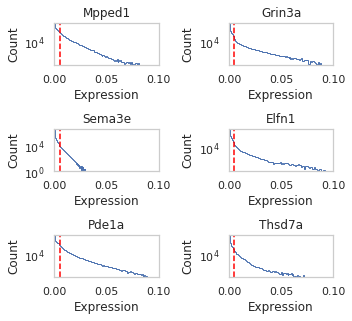

In [28]:
exp_thres = 0.005
viewport = 0.1
gindices = np.arange(len(ds.genes))
np.random.shuffle(gindices)
plt.figure(figsize=[5, 7])
for i, gidx in enumerate(gindices[:6], start=1):
    ax = plt.subplot(5, 2, i)
    n, bins, patches = ax.hist(ds.vf[..., gidx][np.logical_and(ds.vf[..., gidx] > 0, ds.vf[..., gidx] < viewport)], bins=100, log=True, histtype=u'step')
    ax.set_xlim([0, viewport])
    ax.set_ylim([n[0], n[-1]])
    ax.axvline(exp_thres, c='red', ls='--')
    ax.set_title(ds.genes[gidx])
    ax.set_xlabel("Expression")
    ax.set_ylabel("Count")
plt.tight_layout()
pass

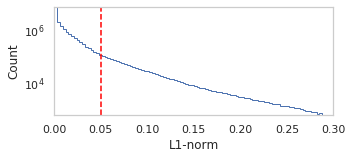

In [30]:
norm_thres = 0.05
gidx = 0
plt.figure(figsize=[5, 2])
#plt.hist(ds.vf[..., gidx][ds.vf[..., gidx] > 0], bins=100, log=True)
n, _, _ = plt.hist(ds.vf_norm[np.logical_and(ds.vf_norm > 0, ds.vf_norm < 0.3)], bins=100, log=True, histtype='step')
ax = plt.gca()
ax.axvline(norm_thres, c='red', ls='--')
ax.set_xlabel("L1-norm")
ax.set_ylabel("Count")

plt.xlim([0, 0.3])
plt.ylim([np.min(n), np.max(n) + 100000])
pass

In [20]:
exp_thres = 0
norm_thres = 0

In [21]:
analysis.find_localmax(search_size=3, min_expression=exp_thres, min_norm=norm_thres)

Found 5979 local max vectors.


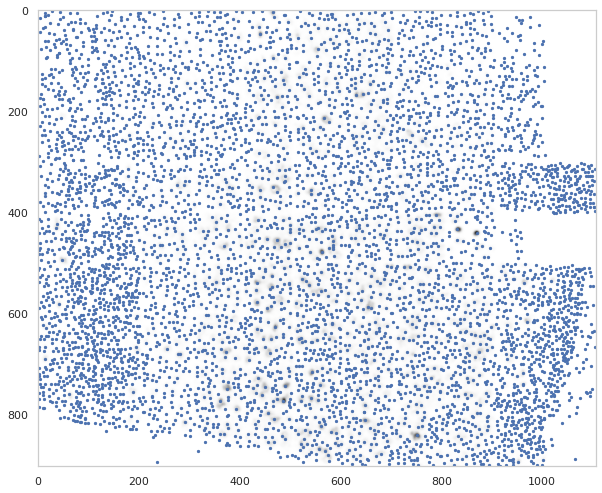

In [22]:
plt.figure(figsize=[10, 20])
ds.plot_l1norm(cmap="Greys")
ds.plot_localmax(s=5)

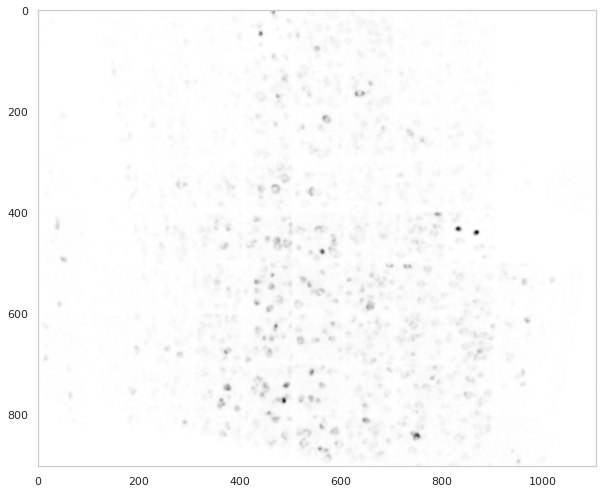

In [25]:
plt.figure(figsize=[10, 20])
ds.plot_l1norm(cmap="Greys")

In [12]:
import pickle
with open("scrna_sigs.pkl", "rb") as f:
    scrna_clusters, scrna_genes, scrna_full_centroids, scrna_colors = pickle.load(f)

In [13]:
gene_conv_dic ={
    "Ngfrap1": "Bex3",
    "Gucy1a3": "Gucy1a1",
    "Ppap2b": "Plpp3",
    "Selm": "Selenom",
    "3110035E14Rik": "Vxn",
    "Ppapdc1a": "Plpp4",
    #"Fam84b": "Lratd2"
}

In [14]:
for f, t in gene_conv_dic.items():
    scrna_genes = np.where(scrna_genes == f, t, scrna_genes)

In [15]:
selected_genes_idx = [list(scrna_genes).index(g) for g in ds.genes]
scrna_uniq_clusters = np.unique(scrna_clusters)
scrna_centroids = scrna_full_centroids[:, selected_genes_idx]

In [41]:
analysis.map_celltypes(scrna_centroids)
analysis.filter_celltypemaps(min_norm=0.03, min_r=0.2)

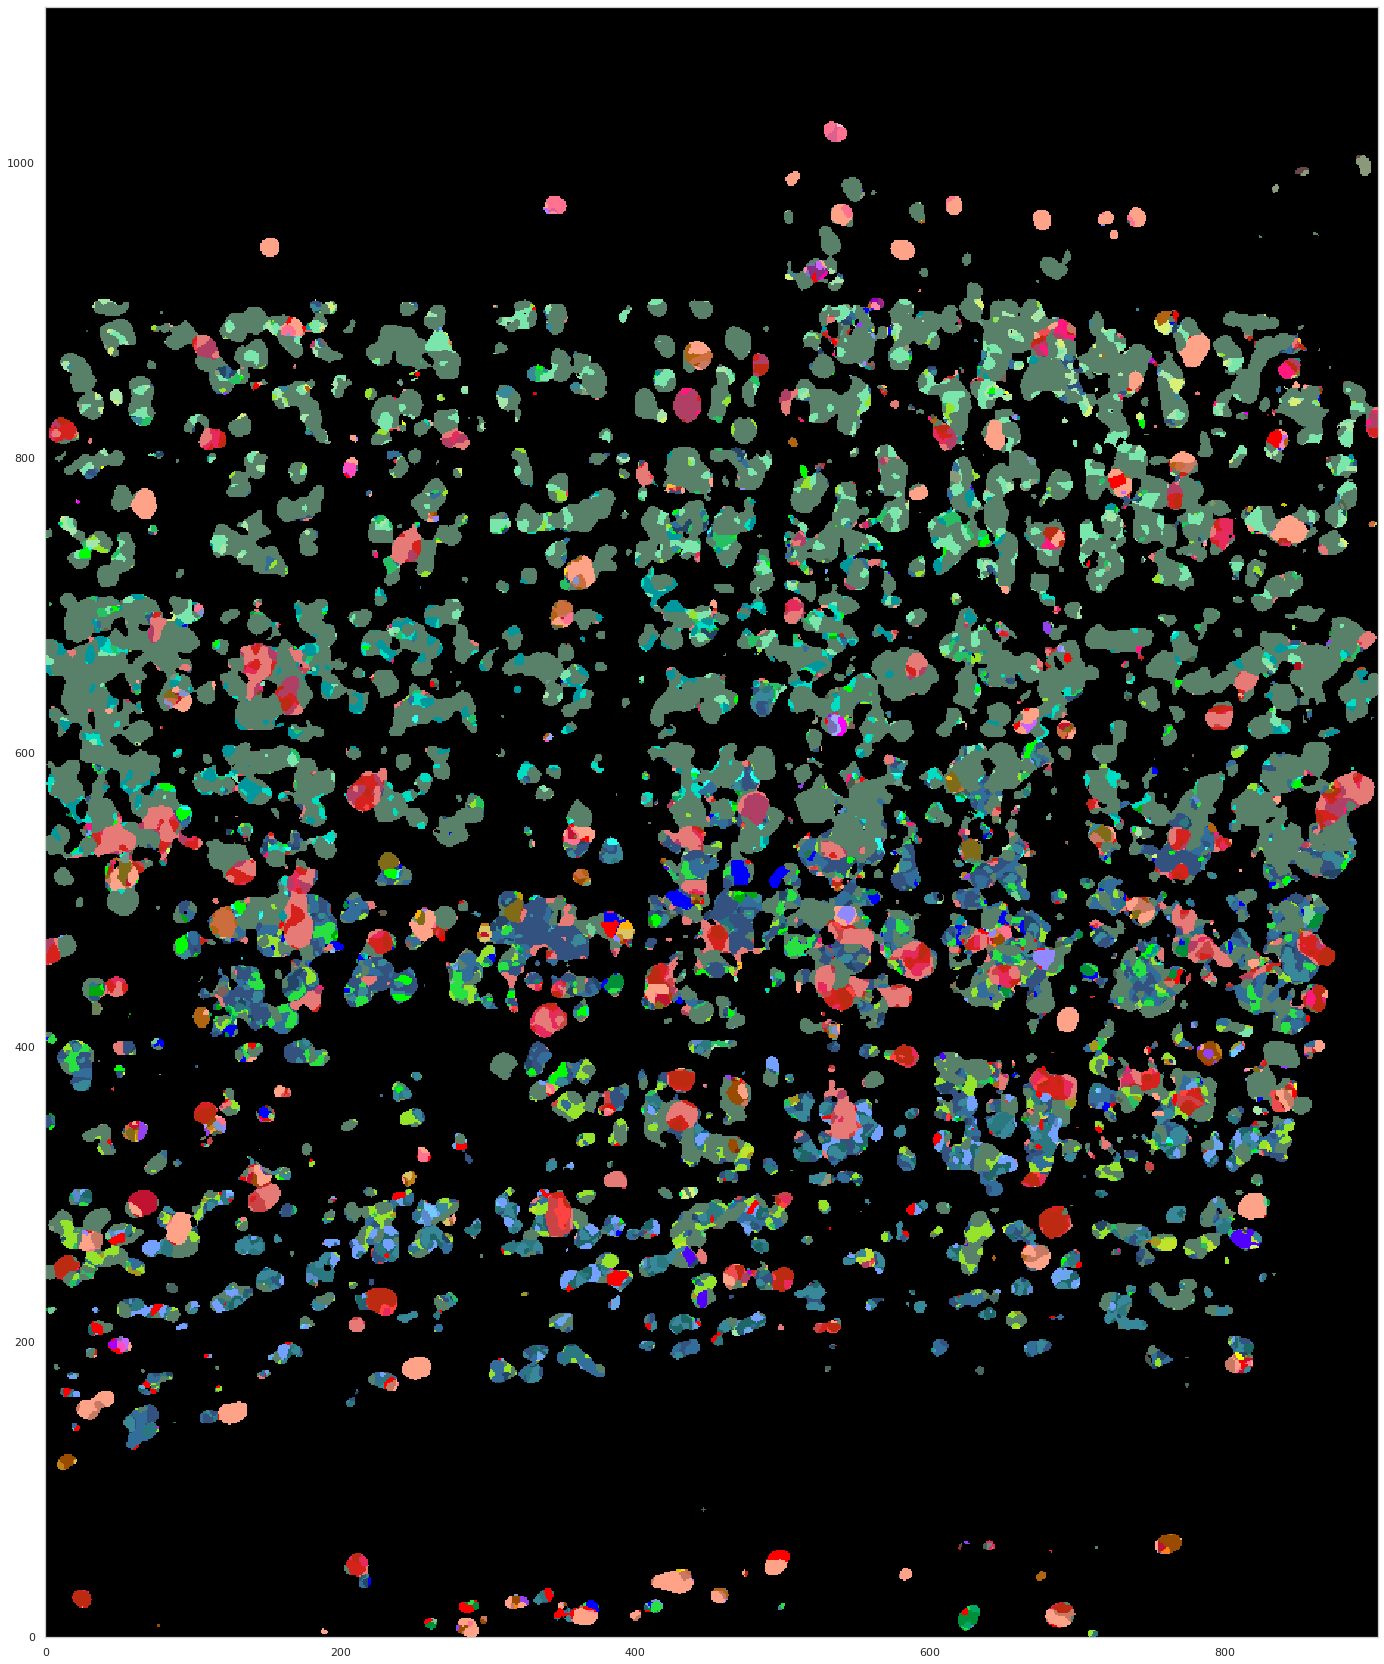

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=[30,30])
_ = ds.plot_celltypes_map(rotate=3, colors=scrna_colors, z=3)

In [56]:
with open("filtered_celltype_maps.pkl", "wb") as f:
    pickle.dump(ds.filtered_celltype_maps, f)
with open("denovo_celltype_colors.pkl", "wb") as f:
    pickle.dump(scrna_colors, f)

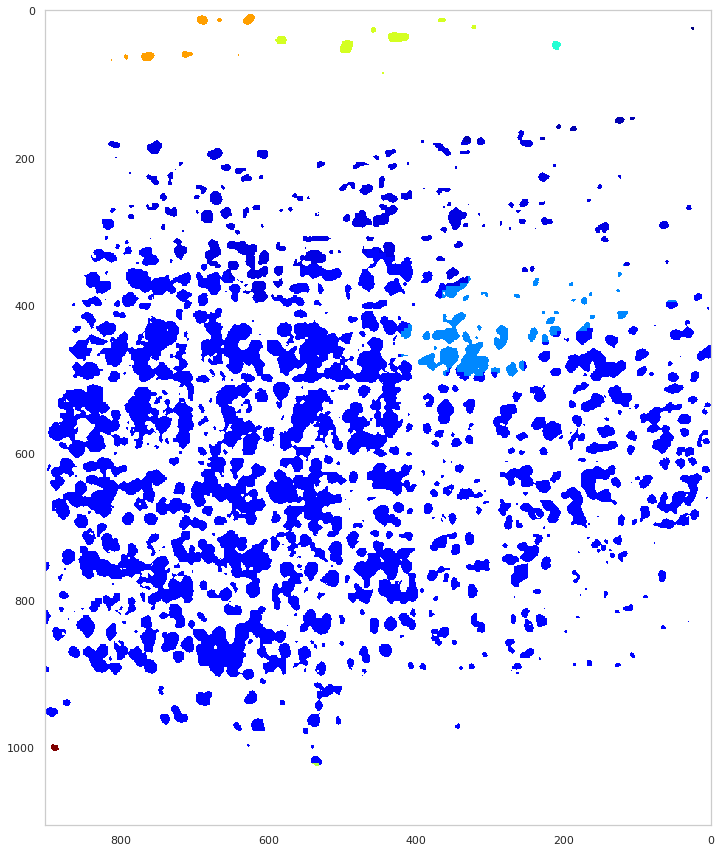

In [63]:
analysis.bin_celltypemaps(step=5, radius=100)
analysis.find_domains(n_clusters=20, merge_remote=False, merge_thres=0.9, norm_thres=10)
plt.figure(figsize=[15, 15])
ds.plot_domains(rotate=1)